In [5]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [6]:
boston=load_boston()

pd_boston=pd.DataFrame(data=boston.data)
price=boston.target
train_x, test_x, train_y, test_y=train_test_split(pd_boston, price, test_size=0.33, random_state=5)

s=preprocessing.StandardScaler()
train_x=s.fit_transform(np.array(train_x))
test_x=s.transform(np.array(test_x))

train=pd.DataFrame(data=train_x)
train['price']=train_y

test_data=np.array(test_x)
test_y=np.array(test_y)


In [154]:
def SGD(X, lr=0.00001, n_iter=1000):
    w0=np.zeros(shape=(1,13))
    b0=0
    t=1
    itr=[]
    loss=[]
    while(t<=n_iter):
        w1=w0
        b1=b0
        w=np.zeros(shape=(1,13))
        b=0
        x_data=X.sample(20)
        x=np.array(x_data.drop('price',axis=1))
        y=np.array(x_data['price'])
        
        
        for i in range(20):  # for getting the derivatives using sgd with k=10
            y_curr=np.dot(w1,x[i])+b1
            w +=x[i] * (y[i] - y_curr)
            b +=(y[i]-y_curr)
        
        los = (b**2)/len(y)
        #print(x.shape[0])    
        w *=(-2/x.shape[0])
        b *=(-2/x.shape[0])
        
        #updating the parameters
        w0=(w1-lr*w)
        b0=(b1-lr*b)
        lr = lr + 0.00003
        t+=1
        itr.append(t)
        loss.append(los)
    
    return w0, b0, itr, loss


def pred(x,w, b):
    y_pred=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred.append(y)
    return np.array(y_pred)

def loss_plot(itr,loss):
    
    plt.plot(itr,loss)
    plt.title("loss in each iteration")
    plt.ylabel("loss")
    plt.xlabel("no.of irerations")
    plt.show()

def plot_values(test_y,y_pred):
    #scatter plot
    plt.scatter(test_y,y_pred,color=["r","b"])
    plt.grid(b=True, linewidth=0.3)
    plt.title('scatter plot between actual values and predicted values')
    plt.xlabel('Actual prices: $Y_i$')
    plt.ylabel("Predicted prices: $\hat{Y}_i$")

    plt.show()
       
    error=mean_squared_error(test_y,y_pred)
    return error

weights: [[-1.20491538  0.68408274 -0.19275511  0.41385168 -1.50477273  3.29787431
  -0.44160247 -2.6960503   2.60905202 -1.70852626 -1.96274475  1.10668078
  -2.94323968]]
intercept: [22.5723129]


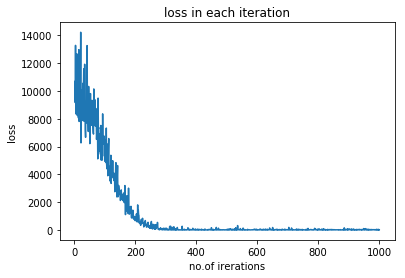

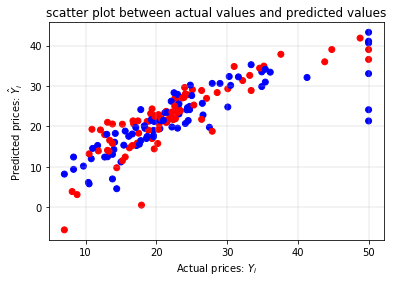

MSE: 27.75794538099557


In [156]:
w, b, itr, loss = SGD(X=train)
print('weights:',w)
print('intercept:',b)
y_pred=pred(test_x, w=w, b=b)
loss_plot(itr, loss) 
error = plot_values(test_y,y_pred)
print("MSE:",error)

## sklearn SGD implementation

In [129]:
clf = SGDRegressor()
clf.fit(train_x, train_y)
print('MSE=',mean_squared_error(test_y, clf.predict(test_x)))


MSE= 31.3692841936234


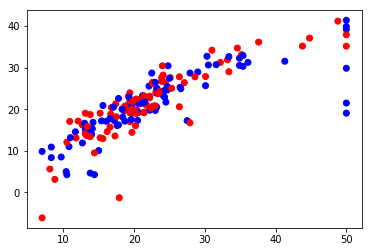

In [130]:
plt.scatter(test_y,clf.predict(test_x),color=["r","b"])

## CONCLUSION:

In [158]:
print("ERROR:")
print("Mean-squared-error with SGDRegressor:",mean_squared_error(test_y, clf.predict(test_x)))
print("**************************************************************************************************************")
print("Mean-squared-error with own implementation:",error)
print(" ")
print(" ")
print("INTERCEPTS:")
print('SGDRegressor intercept:',clf.intercept_)
print("**************************************************************************************************************")
print('own sgd implememtation intercept:',b)
print(" ")
print(" ")
print("WEIGHTS:")
print('SGDRegressor weights:',clf.coef_)
print("**************************************************************************************************************")
print('own sgd implememtation weights:',w)

ERROR:
Mean-squared-error with SGDRegressor: 31.3692841936234
**************************************************************************************************************
Mean-squared-error with own implementation: 27.75794538099557
 
 
INTERCEPTS:
SGDRegressor intercept: [21.88233513]
**************************************************************************************************************
own sgd implememtation intercept: [22.5723129]
 
 
WEIGHTS:
SGDRegressor weights: [-1.05331475  0.41532551 -0.63311884  0.30637731 -0.4356569   3.16316874
 -0.41228775 -1.71090906  0.61141936 -0.36337495 -1.96300195  0.91317329
 -3.03508046]
**************************************************************************************************************
own sgd implememtation weights: [[-1.20491538  0.68408274 -0.19275511  0.41385168 -1.50477273  3.29787431
  -0.44160247 -2.6960503   2.60905202 -1.70852626 -1.96274475  1.10668078
  -2.94323968]]
